In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
fp1 = "/content/drive/MyDrive/Data/house-prices-advanced-regression-techniques/train.csv"
fp2 = "/content/drive/MyDrive/Data/house-prices-advanced-regression-techniques/test.csv"
df1 = pd.read_csv(fp1)
df2 = pd.read_csv(fp2)

In [ ]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df1 = df1.drop([
    "Id",
    "Alley",
    "PoolQC",
    "Fence",
    "MiscFeature",
    "FireplaceQu",
    "LotFrontage",
    "GarageYrBlt",
    "MasVnrType"
], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [ ]:
# Fill missing values in numerical columns with median
num_cols = df1.select_dtypes(include=["int64", "float64"]).columns
df1[num_cols] = df1[num_cols].fillna(df1[num_cols].median())

# Fill missing values in categorical columns with the mode
cat_cols = df1.select_dtypes(include=["object"]).columns
df1[cat_cols] = df1[cat_cols].fillna(df1[cat_cols].mode().iloc[0])

# Check if there are still missing values
print(df1.isnull().sum().sum())

0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding for ordinal columns
label_encoder = LabelEncoder()
for column in df1.select_dtypes(include=['object']).columns:
    df1[column] = label_encoder.fit_transform(df1[column])

# Apply One-Hot Encoding to categorical columns
df1_encoded = pd.get_dummies(df1, drop_first=True)

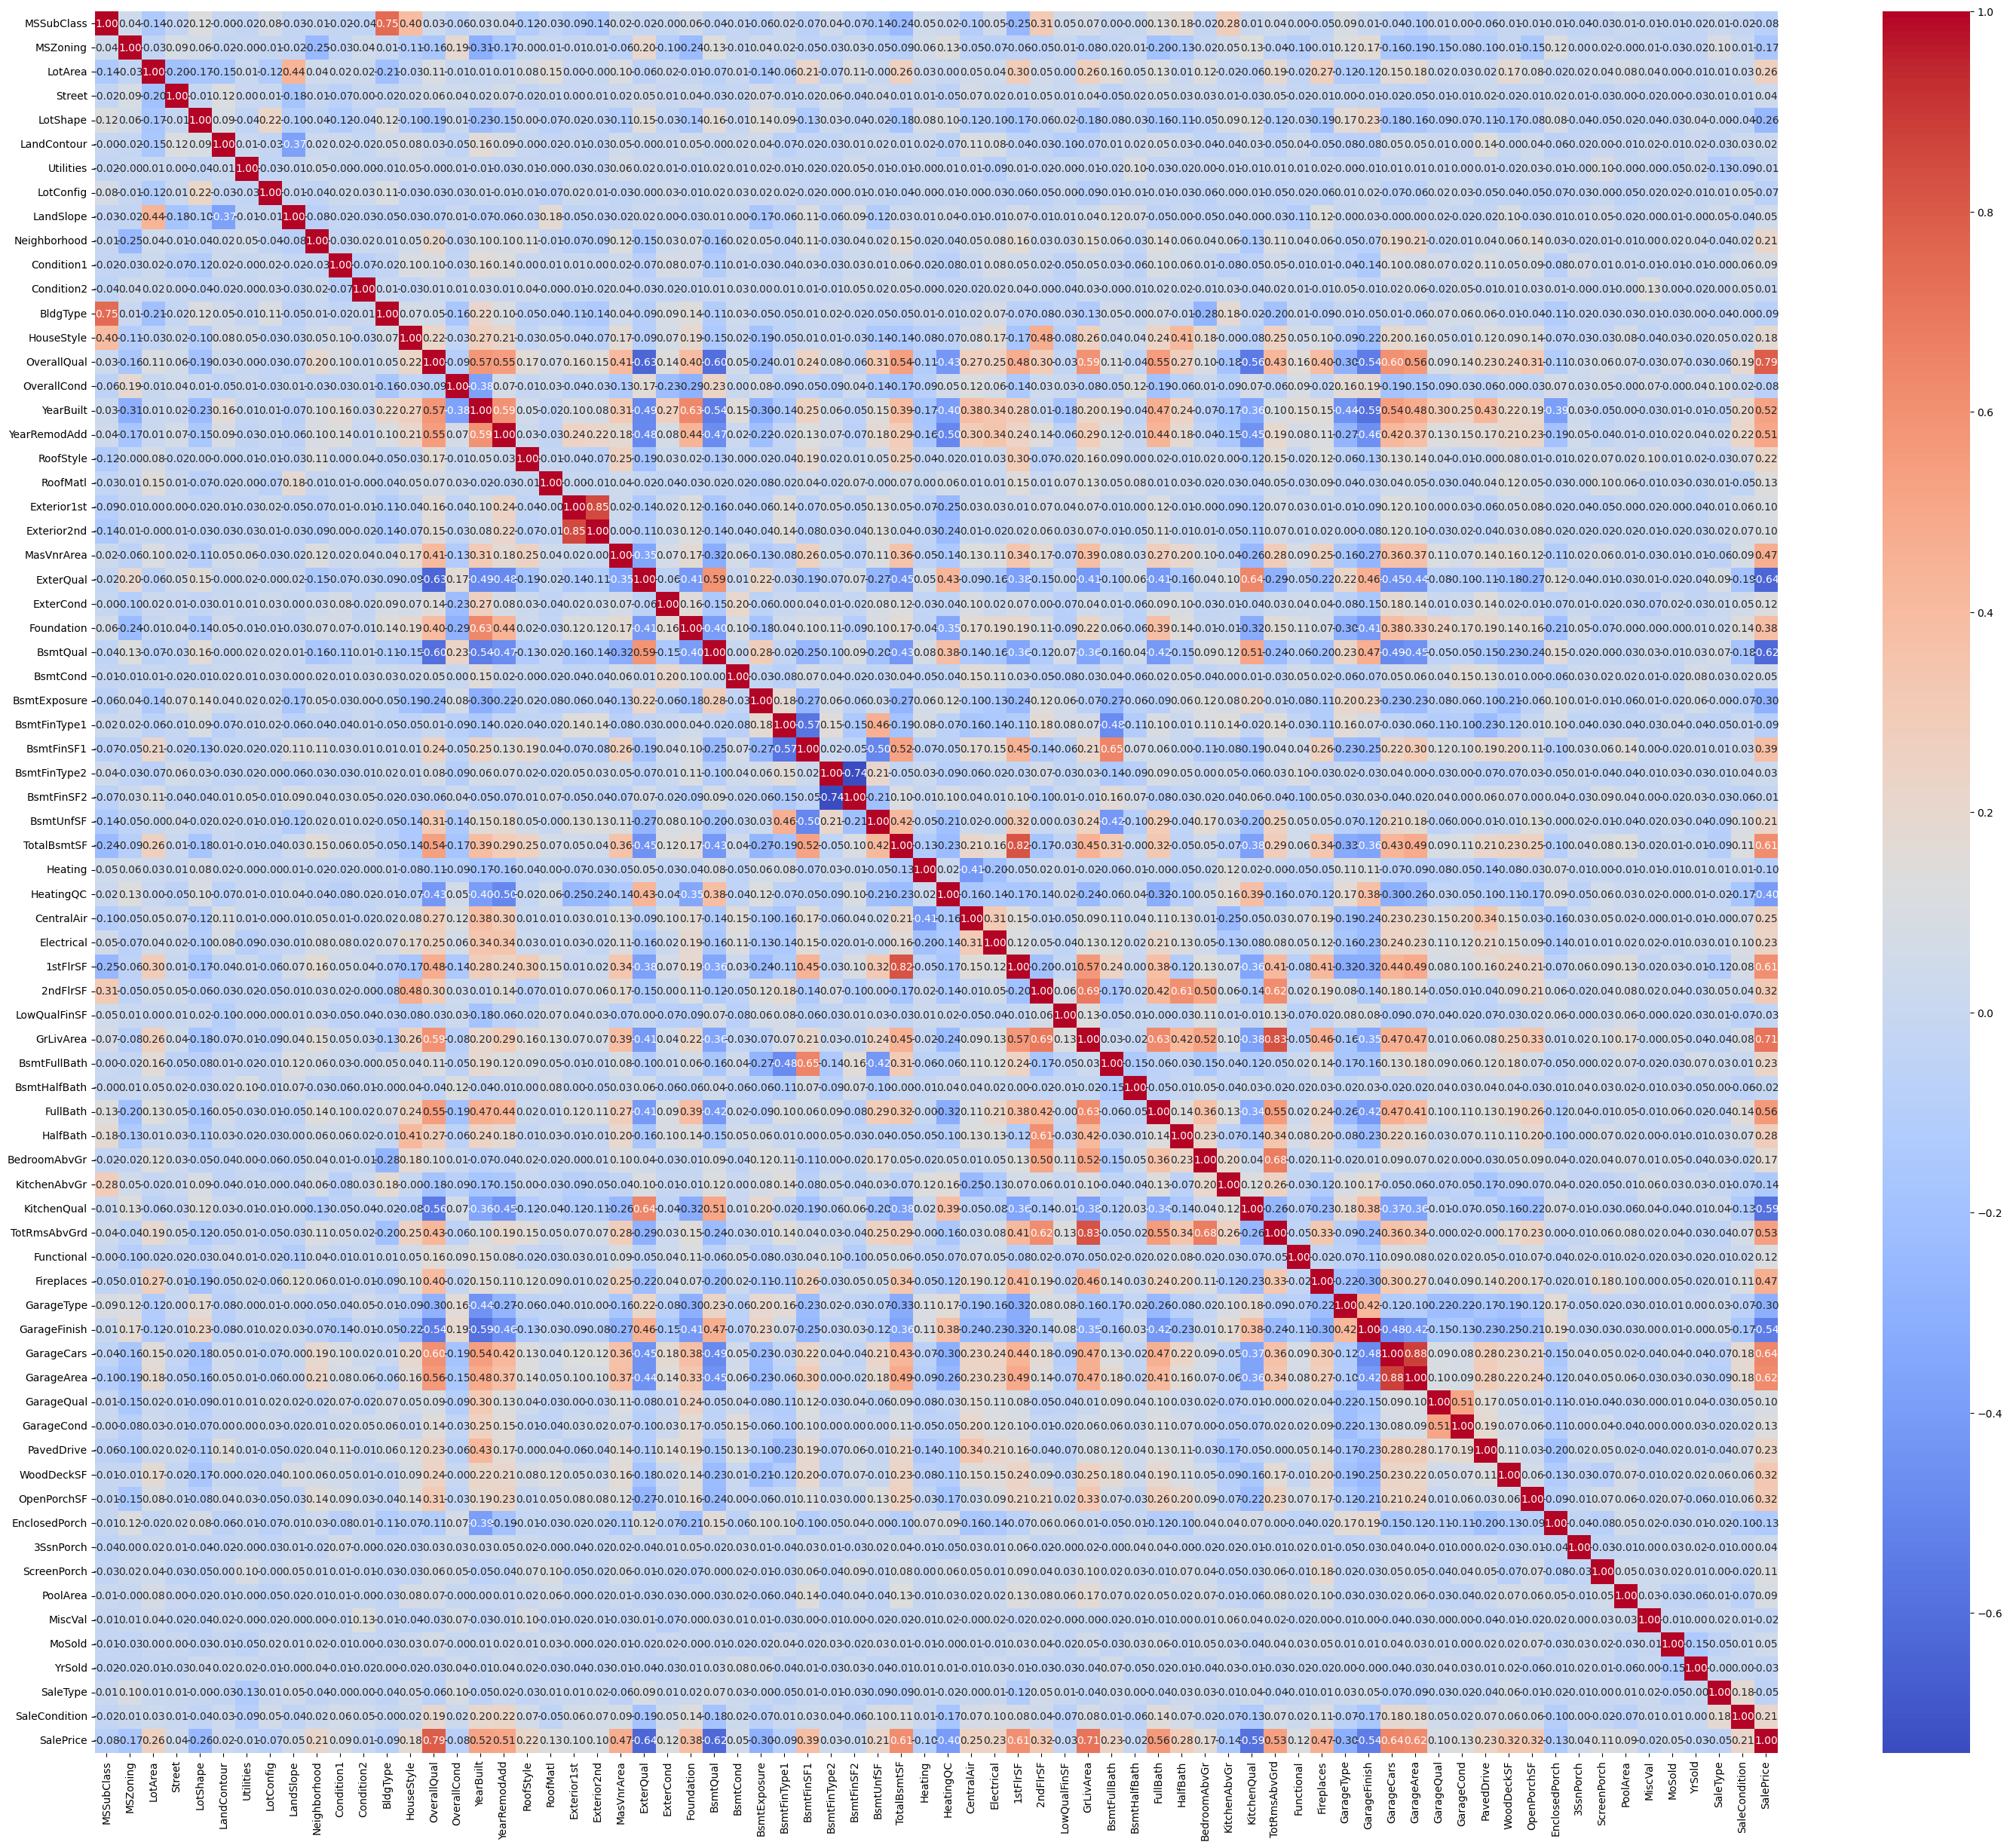

In [ ]:
# Correlation matrix
corr_matrix = df1.corr()
plt.figure(figsize=(36, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

In [ ]:
mandatory_columns = ['LotArea','GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                     'BedroomAbvGr', 'FullBath', 'HalfBath', 'BsmtFullBath']

# Compute the correlation matrix
corr_matrix = df1.corr()
cols_to_drop = corr_matrix.columns[(corr_matrix['SalePrice'] > -0.4) & (corr_matrix['SalePrice'] < 0.4)]
cols_to_drop = [col for col in cols_to_drop if col not in mandatory_columns]
df_train = df1.drop(columns=cols_to_drop)

# Display the columns dropped and the shape of the filtered DataFrame
print(f"Columns dropped: {cols_to_drop}")
print(f"Filtered DataFrame shape: {df_train.shape}")

Columns dropped: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Filtered DataFrame shape: (1460, 23)


In [ ]:
df_train.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,SalePrice
0,8450,7,2003,2003,196.0,2,2,856,0,856,...,2,1,3,2,8,0,1,2,548,208500
1,9600,6,1976,1976,0.0,3,2,1262,0,1262,...,2,0,3,3,6,1,1,2,460,181500
2,11250,7,2001,2002,162.0,2,2,920,0,920,...,2,1,3,2,6,1,1,2,608,223500
3,9550,7,1915,1970,0.0,3,3,756,2,961,...,1,0,3,2,7,1,2,3,642,140000
4,14260,8,2000,2000,350.0,2,2,1145,0,1145,...,2,1,4,2,9,1,1,3,836,250000


In [ ]:
print(df_train.columns)

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


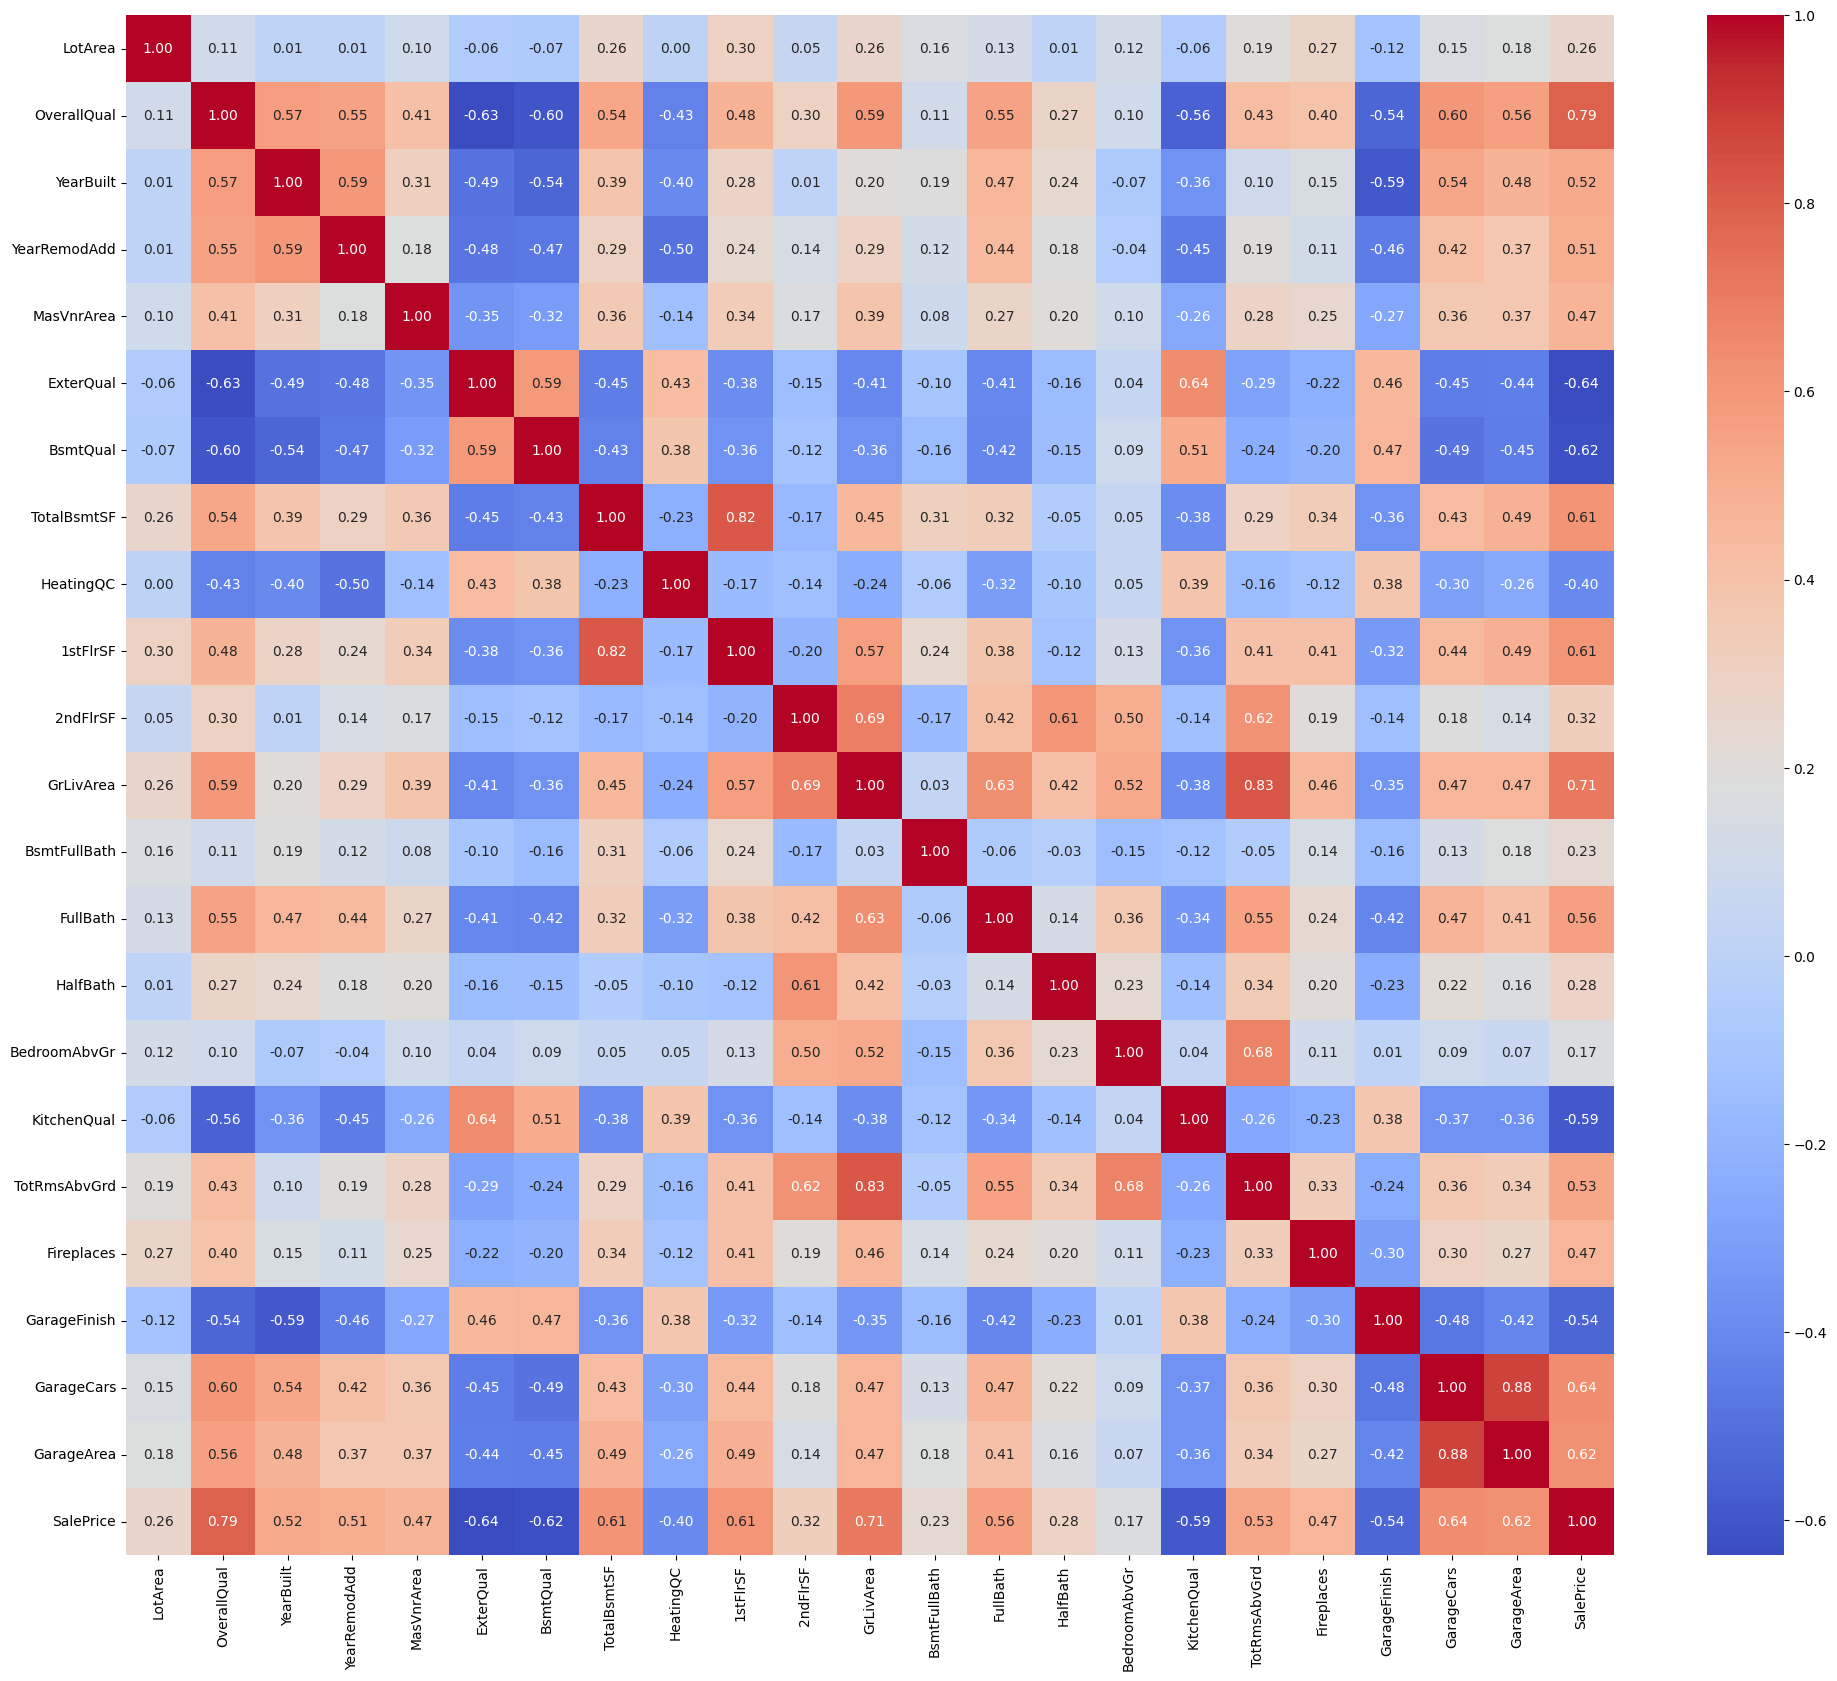

In [ ]:
# Correlation matrix
corr_matrix = df_train.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

    return df_filtered

df_train = remove_outliers(df_train)

print(f"Filtered df_train shape (without outliers): {df_train.shape}")

Filtered df_train shape (without outliers): (1089, 23)


In [ ]:
# Drop columns in df_test that are not present in df_train (excluding 'SalePrice')
df_test = df2[df_train.columns.difference(['SalePrice'])]

# Handle missing values in df_test
df_test = df_test.fillna(df_train.median())

# For categorical columns, fill missing values with a placeholder
categorical_columns = df_test.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_test[col] = df_test[col].fillna('Missing')

# Convert categorical columns to numerical values
label_encoder = LabelEncoder()

for col in categorical_columns:
    df_test[col] = df_test[col].astype(str)
    df_test[col] = label_encoder.fit_transform(df_test[col])

print(f"Processed test DataFrame shape: {df_test.shape}")

Processed test DataFrame shape: (1459, 22)


In [ ]:
# Split df_train into features (X) and target (y)
X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set (X_test)
y_pred_test = model.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 329836303.60408354
R-squared (R²): 0.8663505735406061
Root Mean Squared Error (RMSE): 18161.395970686932


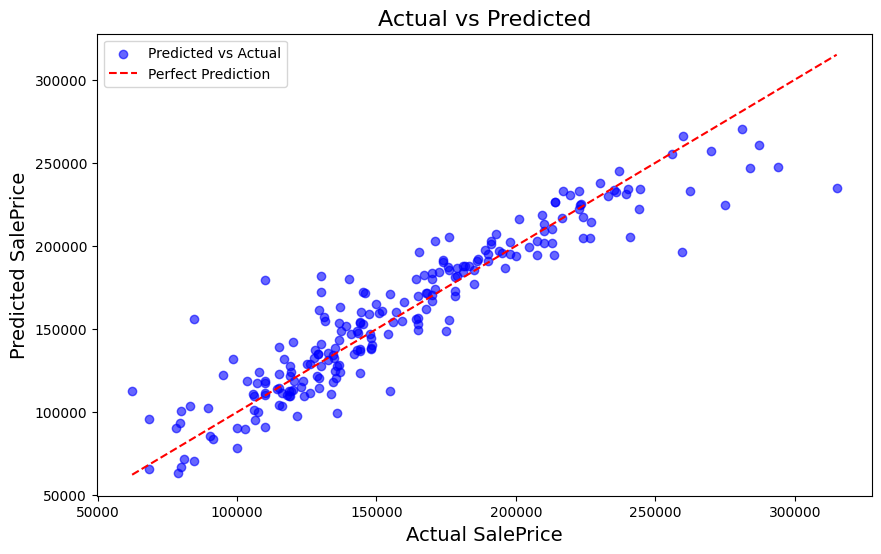

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, label='Predicted vs Actual')

# Plot line of perfect prediction (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.title('Actual vs Predicted', fontsize=16)
plt.xlabel('Actual SalePrice', fontsize=14)
plt.ylabel('Predicted SalePrice', fontsize=14)
plt.legend()
plt.show()

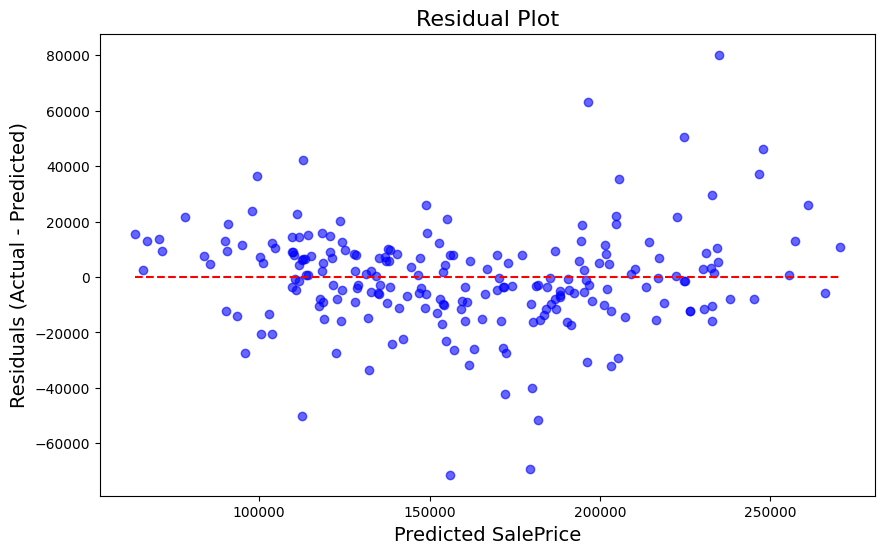

In [ ]:
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, color='blue', alpha=0.6)
plt.hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), color='red', linestyle='--')
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted SalePrice', fontsize=14)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=14)
plt.show()